In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd "/content/gdrive/My Drive/"

Mounted at /content/gdrive
/content/gdrive/My Drive


In [2]:
import sys
import torch
# pour importer pytorch3D sans probleme
pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
version_str="".join([
    f"py3{sys.version_info.minor}_cu",
    torch.version.cuda.replace(".",""),
    f"_pyt{pyt_version_str}"
])
!pip install pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html
%cd "/content/gdrive/My Drive/git/scikit-exercises"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/py37_cu113_pyt1121/download.html
     |████████████████████████████████| 45.7 MB 1.2 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 50 kB 7.0 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220512-py3-none-any.whl size=61288 sha256=571558503ce7b01cb329cd26d5c32fa8abc9d9450e67ede9ff199139ae649629
  Stored in directory: /root/.cache/pip/wheels/68/20/f9/a11a0dd63f4c13678b2a5ec488e48078756505c7777b75b29e
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31549 sha256=9690d2de3c143ed220ca9b7f03eb5109f9f6ce6c232a2988b4ef3d892687d41d
  Stored in directory: /root/.cache/pip/wheels/aa/cc/ed/ca4e88beef656b01c84b9185196513ef2faf74a5a379b043a7
Successfully built fvcore iopath
/content/gdrive/My Drive/git/scikit-exercises


In [3]:

import pytorch3d as p3d
import torch, sys
print(p3d.__version__)

0.7.0


In [4]:
%cd "/content/gdrive/My Drive/git/scikit-exercises"
import os
import torch
import matplotlib.pyplot as plt

# Util function for loading meshes
from pytorch3d.io import load_objs_as_meshes, load_obj

# Data structures and functions for rendering
from pytorch3d.structures import Meshes
from pytorch3d.vis.plotly_vis import AxisArgs, plot_batch_individually, plot_scene
from pytorch3d.vis.texture_vis import texturesuv_image_matplotlib
from pytorch3d.renderer import (
    look_at_view_transform,
    FoVPerspectiveCameras, 
    PointLights, 
    DirectionalLights, 
    Materials, 
    RasterizationSettings, 
    MeshRenderer, 
    MeshRasterizer,  
    SoftPhongShader,
    TexturesUV,
    TexturesVertex
)

# add path for demo utils functions 
import sys
import os
sys.path.append(os.path.abspath(''))

/content/gdrive/My Drive/git/scikit-exercises


In [5]:
!wget https://raw.githubusercontent.com/facebookresearch/pytorch3d/main/docs/tutorials/utils/plot_image_grid.py
from plot_image_grid import image_grid


--2022-10-13 08:56:21--  https://raw.githubusercontent.com/facebookresearch/pytorch3d/main/docs/tutorials/utils/plot_image_grid.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1608 (1.6K) [text/plain]
Saving to: ‘plot_image_grid.py.3’

plot_image_grid.py. 100%[===================>]   1.57K  --.-KB/s    in 0.001s  

2022-10-13 08:56:21 (1.68 MB/s) - ‘plot_image_grid.py.3’ saved [1608/1608]



In [6]:
!mkdir -p data/cow_mesh
!wget -P data/cow_mesh https://dl.fbaipublicfiles.com/pytorch3d/data/cow_mesh/cow.obj
!wget -P data/cow_mesh https://dl.fbaipublicfiles.com/pytorch3d/data/cow_mesh/cow.mtl
!wget -P data/cow_mesh https://dl.fbaipublicfiles.com/pytorch3d/data/cow_mesh/cow_texture.png

--2022-10-13 08:56:30--  https://dl.fbaipublicfiles.com/pytorch3d/data/cow_mesh/cow.obj
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.74.142, 104.22.75.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.74.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 330659 (323K) [text/plain]
Saving to: ‘data/cow_mesh/cow.obj.3’

cow.obj.3           100%[===================>] 322.91K   888KB/s    in 0.4s    

2022-10-13 08:56:31 (888 KB/s) - ‘data/cow_mesh/cow.obj.3’ saved [330659/330659]

--2022-10-13 08:56:31--  https://dl.fbaipublicfiles.com/pytorch3d/data/cow_mesh/cow.mtl
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.74.142, 104.22.75.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.74.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155 [text/plain]
Saving to: ‘data/cow_mesh/cow.mtl.3’

cow.mtl.3           100%[==

In [53]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")

# Set paths
DATA_DIR = "./data"
obj_filename = os.path.join(DATA_DIR, "cow_mesh/cow.obj")

# Load obj file
mesh = load_objs_as_meshes([obj_filename], device=device)


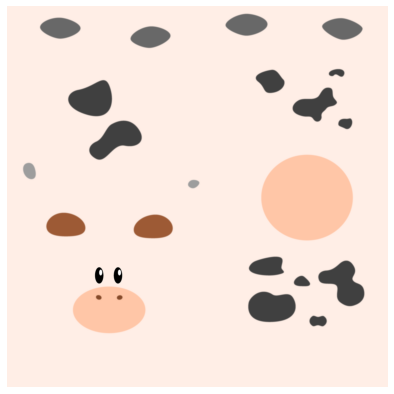

In [54]:
plt.figure(figsize=(7,7))
texture_image=mesh.textures.maps_padded()
plt.imshow(texture_image.squeeze().cpu().numpy())
plt.axis("off");

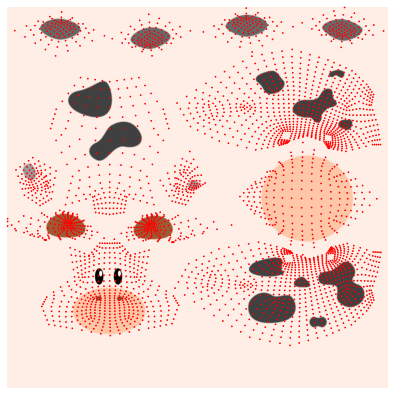

In [55]:
plt.figure(figsize=(7,7))
texturesuv_image_matplotlib(mesh.textures, subsample=None)
plt.axis("off");
verts = mesh.verts_packed()


In [56]:

# Define the settings for rasterization and shading. Here we set the output image to be of size
# 512x512. As we are rendering images for visualization purposes only we will set faces_per_pixel=1
# and blur_radius=0.0. We also set bin_size and max_faces_per_bin to None which ensure that 
# the faster coarse-to-fine rasterization method is used. Refer to rasterize_meshes.py for 
# explanations of these parameters. Refer to docs/notes/renderer.md for an explanation of 
# the difference between naive and coarse-to-fine rasterization. 
raster_settings = RasterizationSettings(
    image_size=512, 
    blur_radius=0.0, 
    faces_per_pixel=1, 
)

# Place a point light in front of the object. As mentioned above, the front of the cow is facing the 
# -z direction. 
lights = PointLights(device=device, location=[[0.0, 0.0, -3.0]])

def render(mesh, a=180) :
  # Initialize a camera.
  # With world coordinates +Y up, +X left and +Z in, the front of the cow is facing the -Z direction. 
  # So we move the camera by 180 in the azimuth direction so it is facing the front of the cow. 
  R, T = look_at_view_transform(2.7, 0, a) 
  cameras = FoVPerspectiveCameras(device=device, R=R, T=T)

  # Create a Phong renderer by composing a rasterizer and a shader. The textured Phong shader will 
  # interpolate the texture uv coordinates for each vertex, sample from a texture image and 
  # apply the Phong lighting model
  renderer = MeshRenderer(
      rasterizer=MeshRasterizer(
          cameras=cameras, 
          raster_settings=raster_settings
      ),
      shader=SoftPhongShader(
          device=device, 
          cameras=cameras,
          lights=lights
      )
  )
  images = renderer(mesh)
  return images

torch.Size([1, 512, 512, 4])


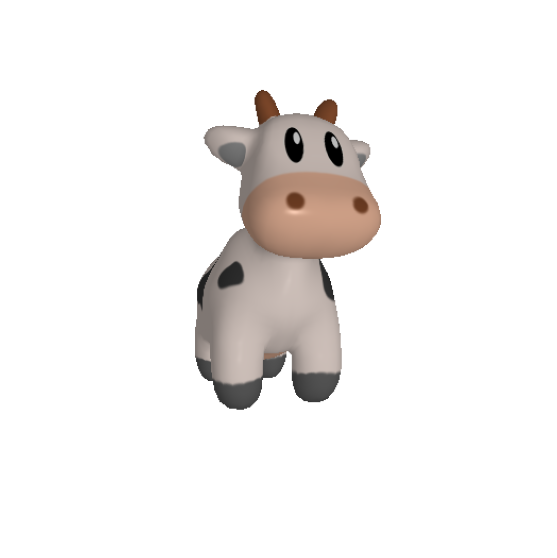

In [57]:
images = render(mesh, a=160)
print(images.shape)
plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].cpu().numpy())
plt.axis("off");

In [60]:
# les sommets et les facettes du maillage 
vertices, faces = mesh.verts_packed(),mesh.faces_packed()
deform_verts = torch.normal(0, 0.01, size=vertices.shape).to("cuda:0")
new = mesh.offset_verts(deform_verts)

torch.Size([1, 512, 512, 4])


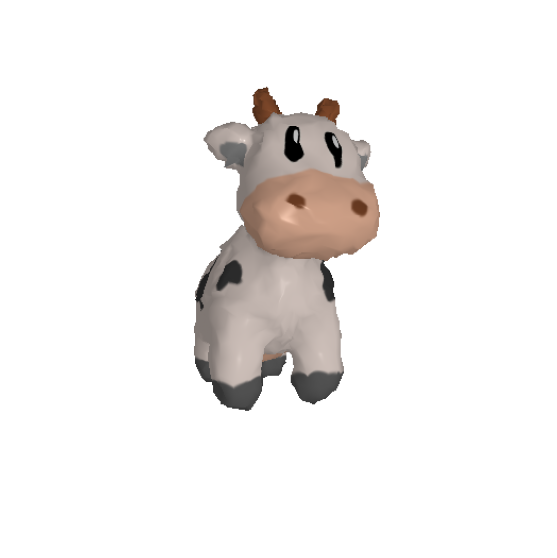

In [61]:
images = render(new, a=160)
print(images.shape)
plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].cpu().numpy())
plt.axis("off");